In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
'''
Importing useful libraries
'''
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sea
import sklearn 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Read the dataset
path = '/content/drive/My Drive/UCI_WineQuality.csv'
data = pd.read_csv(path)

In [ ]:
#Show the data i.e. default is 5, can be changed by n = 6 or 13 etc.
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#Show the statistics i.e. mean, std, max, lower, upper percentile values
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
#Show the dataset summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
#Detecting missing or null values in the dataset
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
#For such features who have null/missing values, 
#We will add mean values in it. 
#Number of occurance of that value for specific feature

data['fixed acidity'].value_counts()

#data['volatile acidity'].value_counts()
#data['citric acid'].value_counts()
#data['residual sugar'].value_counts()
#data['chlorides'].value_counts()
#data['pH'].value_counts()
#data['sulphates'].value_counts()

6.80     354
6.60     326
6.40     305
7.00     282
6.90     279
        ... 
14.30      1
15.90      1
13.80      1
14.20      1
6.45       1
Name: fixed acidity, Length: 106, dtype: int64

In [ ]:
mean_fa = data['fixed acidity'].mean()
data['fixed acidity'].fillna(mean_fa, inplace = True)
data['fixed acidity'].isnull().sum()

0

In [ ]:
data['volatile acidity'].value_counts()

0.280    286
0.240    265
0.260    255
0.250    238
0.220    235
        ... 
0.805      1
1.130      1
1.185      1
0.565      1
0.865      1
Name: volatile acidity, Length: 187, dtype: int64

In [ ]:
mean_va = data['volatile acidity'].mean()
data['volatile acidity'].fillna(mean_va, inplace = True)
data['volatile acidity'].isnull().sum()

0

In [ ]:
data['citric acid'].value_counts()

0.30    337
0.28    301
0.32    289
0.49    283
0.26    257
       ... 
1.66      1
0.75      1
0.86      1
0.99      1
1.23      1
Name: citric acid, Length: 89, dtype: int64

In [ ]:
mean_ca = data['citric acid'].mean()
data['citric acid'].fillna(mean_ca, inplace = True)
data['citric acid'].isnull().sum()

0

In [ ]:
data['residual sugar'].value_counts()

2.00     235
1.80     228
1.60     223
1.40     219
1.20     195
        ... 
14.15      1
14.05      1
3.15       1
8.95       1
20.30      1
Name: residual sugar, Length: 316, dtype: int64

In [ ]:
mean_rs = data['residual sugar'].mean()
data['residual sugar'].fillna(mean_rs, inplace = True)
data['residual sugar'].isnull().sum()

0

In [ ]:
data['chlorides'].value_counts()

0.044    206
0.036    200
0.042    187
0.046    185
0.050    182
        ... 
0.213      1
0.165      1
0.150      1
0.144      1
0.125      1
Name: chlorides, Length: 214, dtype: int64

In [ ]:
mean_c = data['chlorides'].mean()
data['chlorides'].fillna(mean_c, inplace = True)
data['chlorides'].isnull().sum()

0

In [ ]:
data['pH'].value_counts()

3.16    200
3.14    193
3.22    185
3.20    176
3.19    170
       ... 
3.81      1
2.77      1
2.82      1
2.84      1
3.82      1
Name: pH, Length: 108, dtype: int64

In [ ]:
mean_pH = data['pH'].mean()
data['pH'].fillna(mean_pH, inplace = True)
data['pH'].isnull().sum()

0

In [ ]:
data['sulphates'].value_counts()

0.50    275
0.46    243
0.54    234
0.44    232
0.38    214
       ... 
1.59      1
1.12      1
1.33      1
1.56      1
1.62      1
Name: sulphates, Length: 111, dtype: int64

In [ ]:
mean_s = data['sulphates'].mean()
data['sulphates'].fillna(mean_s, inplace = True)
data['sulphates'].isnull().sum()

0

In [ ]:
#Verifying for missing or null values in the dataset
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

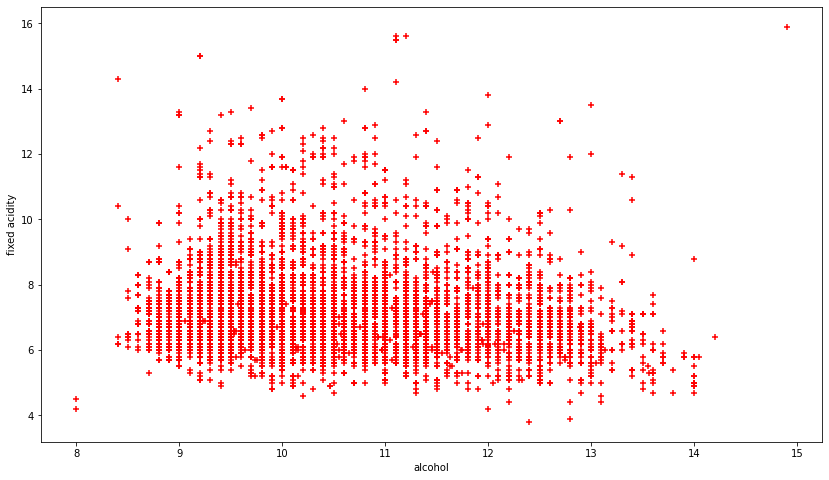

In [ ]:
'''
Visualization of the data
x - alcohol
y - fixed acidity
'''
plt.figure(figsize=(14, 8))
plt.scatter(x = 'alcohol', y = 'fixed acidity', data = data, marker = '+', c='r')
plt.xlabel('alcohol')
plt.ylabel('fixed acidity')
plt.show()

[]

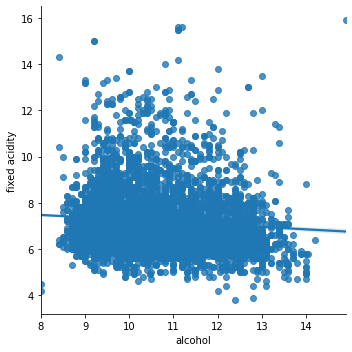

In [ ]:
#Finding linear relationship in this two features
sea.lmplot(x='alcohol', y='fixed acidity', data = data)
plt.plot()

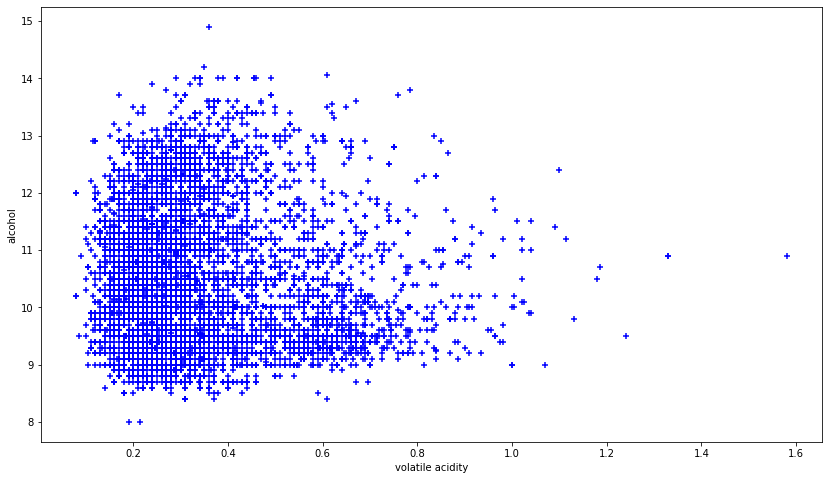

In [ ]:
'''
x - volatile acidity
y - alcohol
'''
plt.figure(figsize=(14,8))
plt.scatter(x ='volatile acidity', y = 'alcohol', data = data, marker = '+', c = 'b')
plt.xlabel('volatile acidity')
plt.ylabel('alcohol')
plt.show()

[]

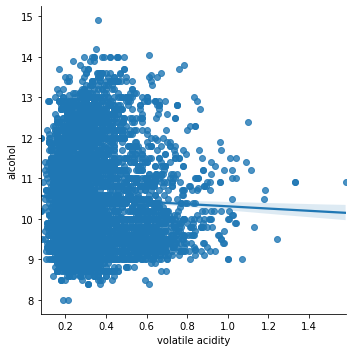

In [ ]:
sea.lmplot(x='volatile acidity', y='alcohol', data = data)
plt.plot()

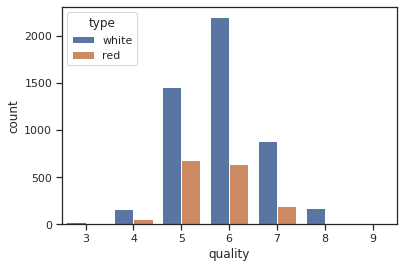

In [ ]:
sea.set(style = 'ticks')
sea.countplot(data['quality'], hue = 'type', data = data)
plt.show()

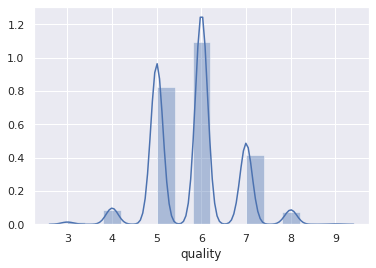

In [ ]:
'''
Distribution
'''
sea.set()
sea.distplot(data['quality'], bins = 15)
plt.show()

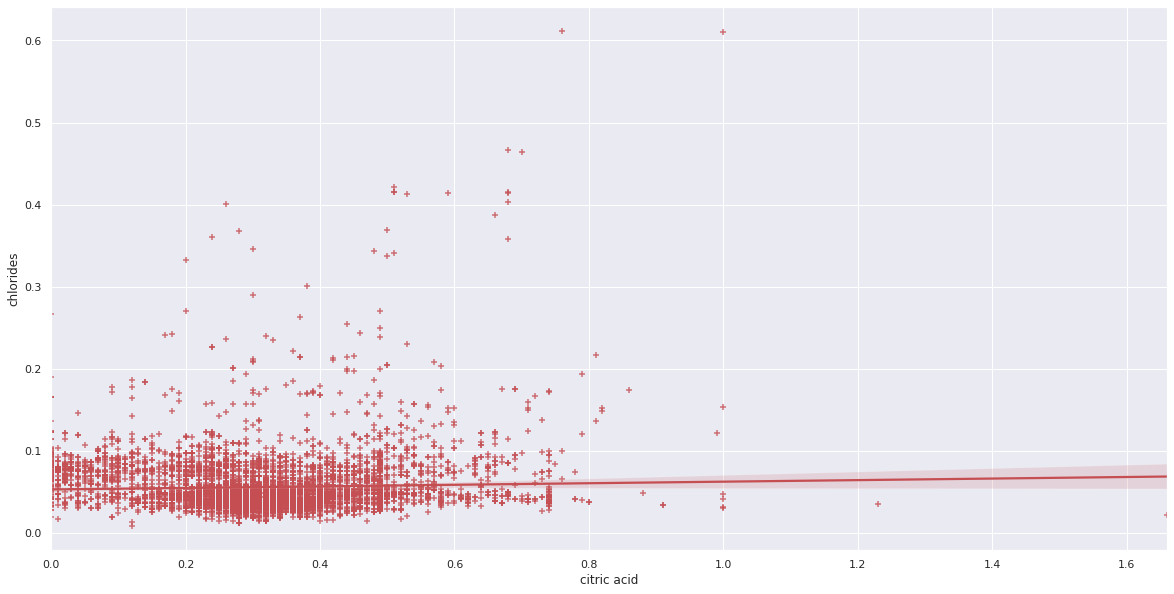

In [ ]:
plt.figure(figsize = (20, 10))
sea.regplot(x = 'citric acid', y = 'chlorides', data = data, marker = '+', color = 'r')
plt.show()

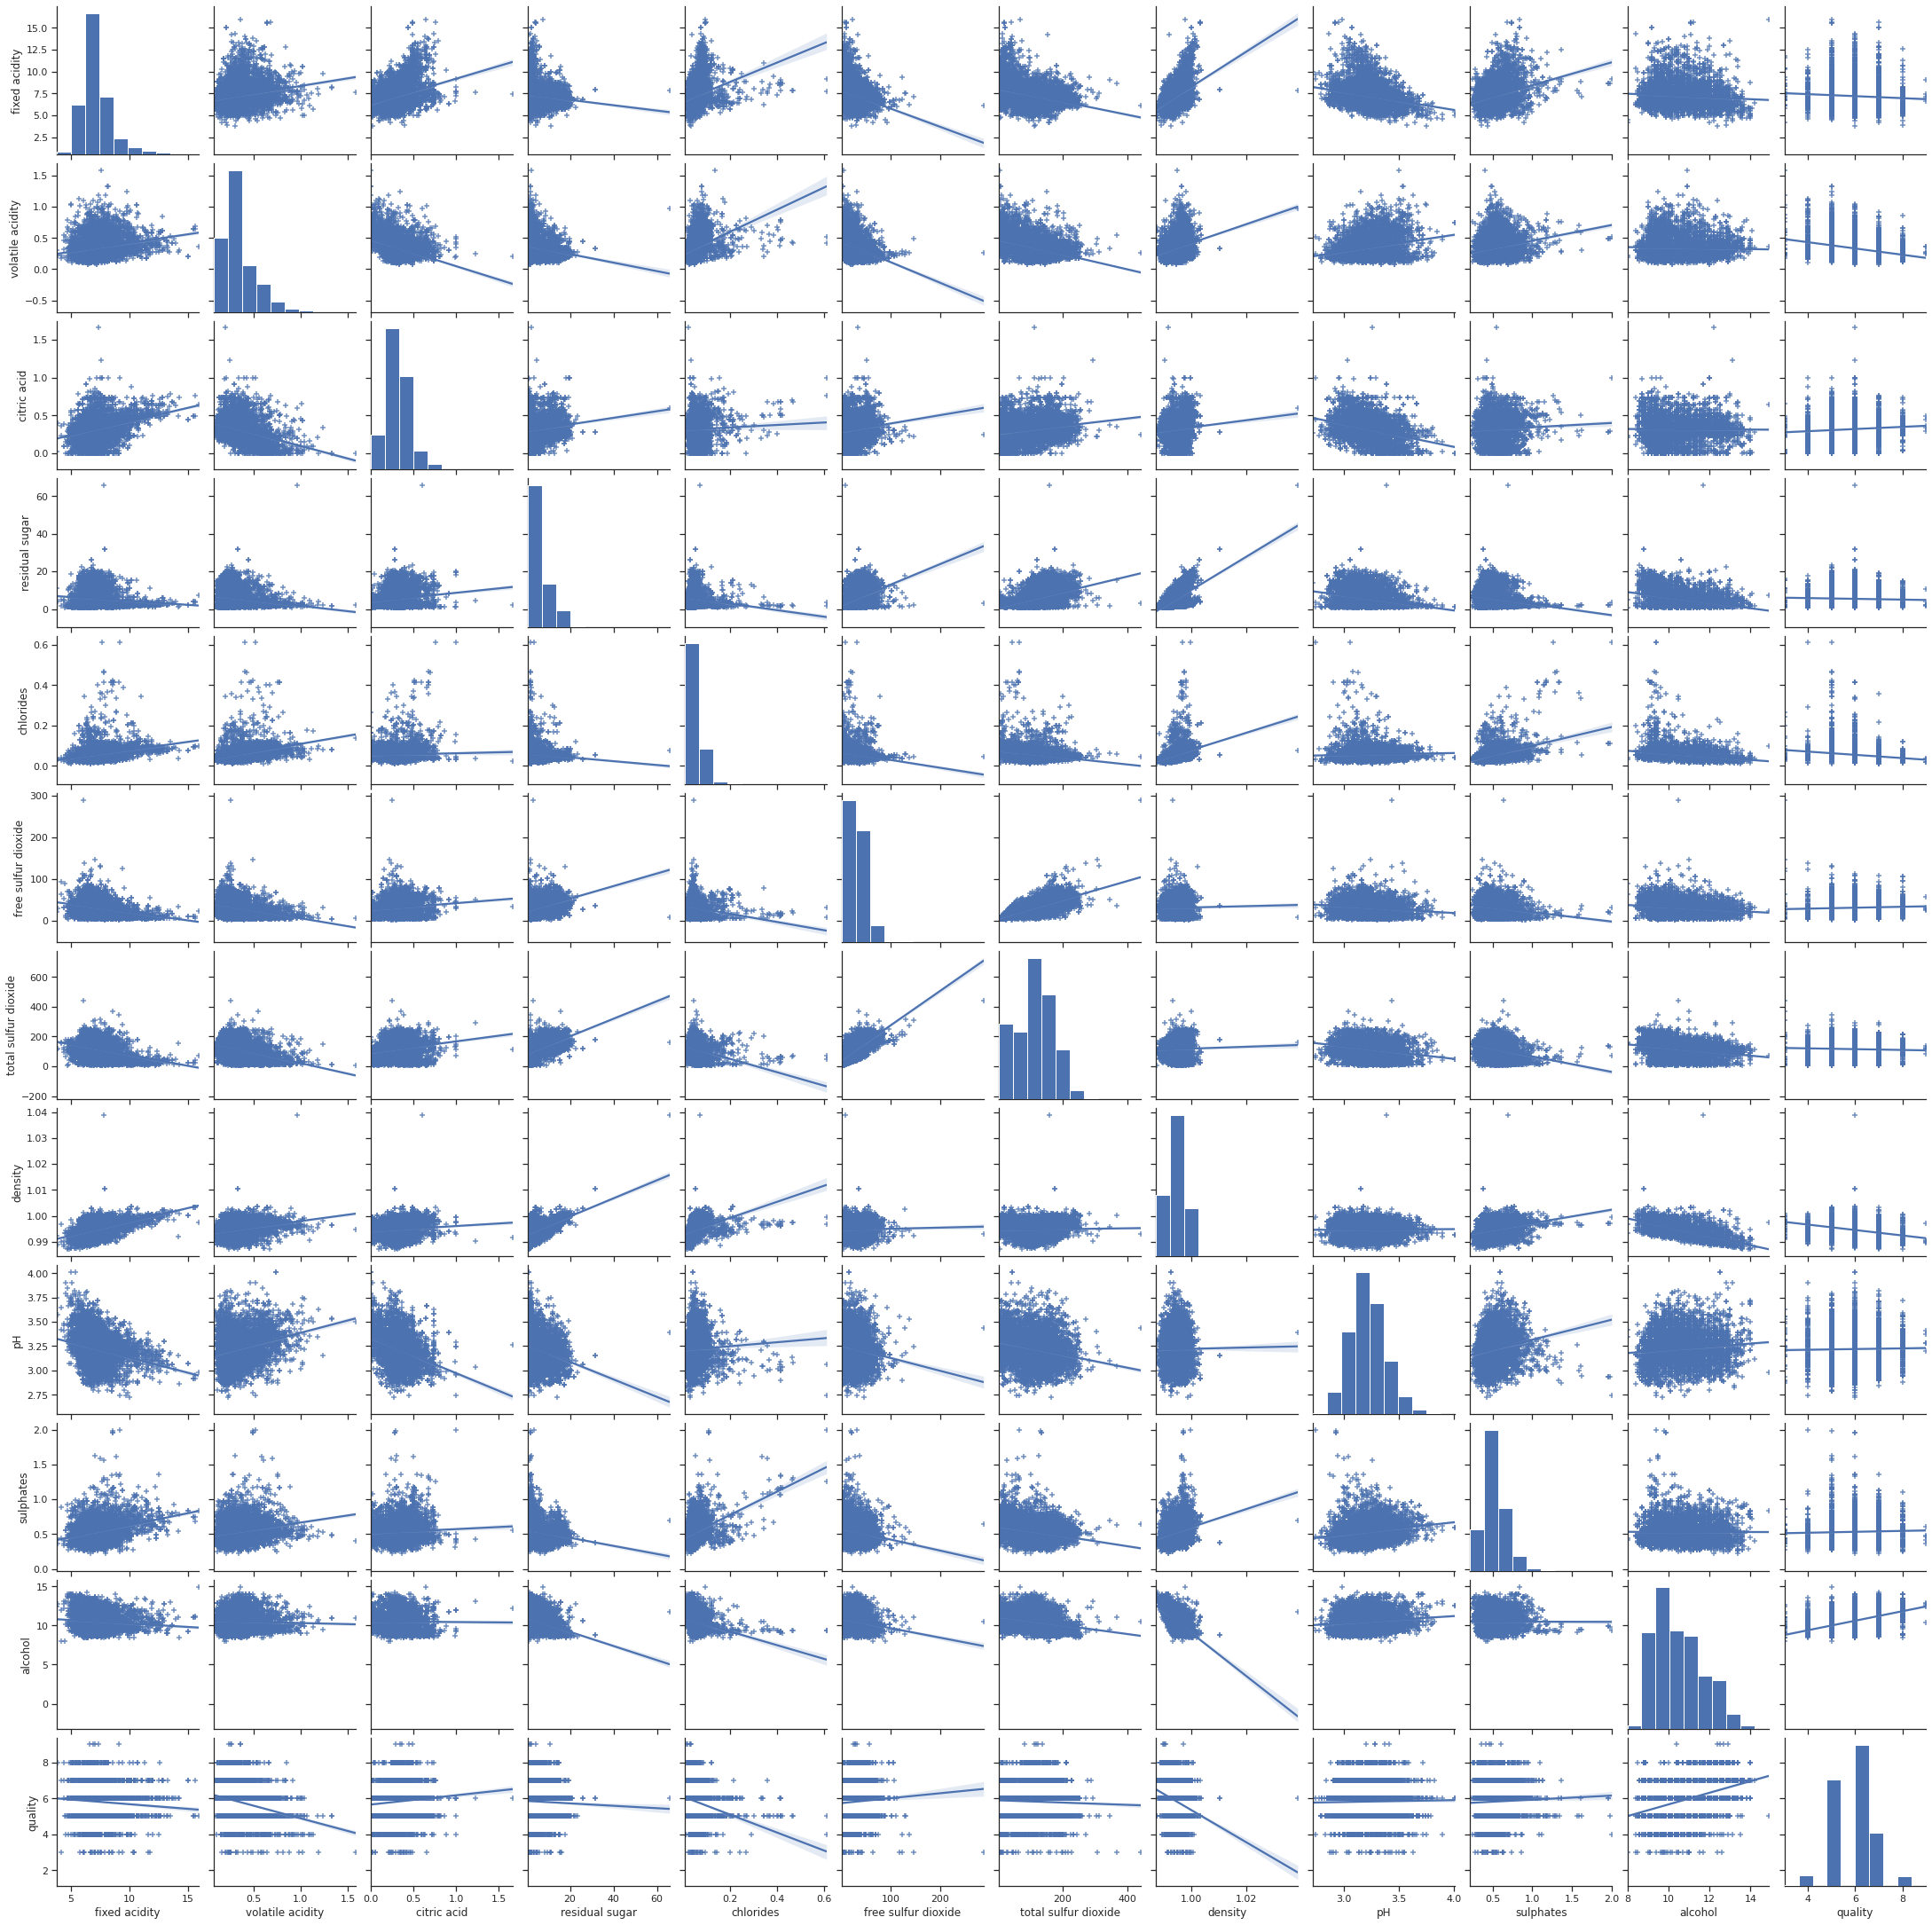

In [ ]:
sea.set(style = 'ticks')
sea.pairplot(data, markers = ['+'], kind = 'reg')
plt.show()

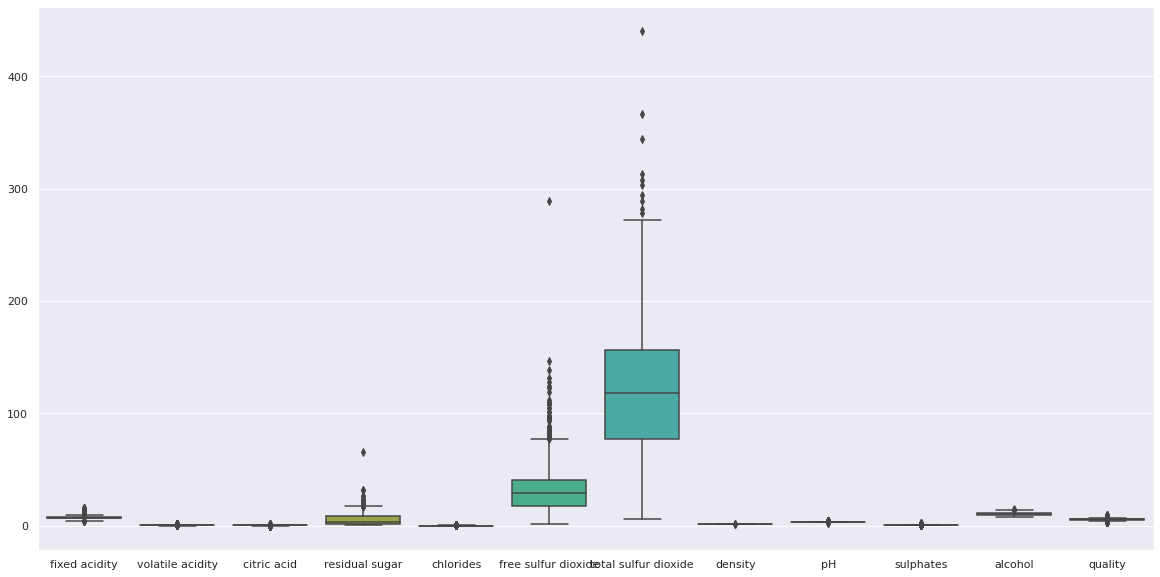

In [ ]:
'''
Plotting the box plot for outliers detection. 
Reference - https://seaborn.pydata.org/generated/seaborn.boxplot.html
'''
sea.set()
plt.figure(figsize = (20, 10))
sea.boxplot(data = data)
#plt.show()

In [ ]:
'''
Removing outliers for Sulfer Dioxide by defining high and low limit
Reference - https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
'''
low = data['free sulfur dioxide'].mean() - 3*data['free sulfur dioxide'].std()
high = data['free sulfur dioxide'].mean() + 3*data['free sulfur dioxide'].std()
print('low = ', low)
print('high = ', high)

low =  -22.722879937833156
high =  83.77351869418224


In [ ]:
data_copy = data[(data['free sulfur dioxide'] > low) & (data['free sulfur dioxide'] < high)]
print(data_copy)

       type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0     white            7.0             0.270  ...   0.450000      8.8        6
1     white            6.3             0.300  ...   0.490000      9.5        6
2     white            8.1             0.280  ...   0.440000     10.1        6
3     white            7.2             0.230  ...   0.400000      9.9        6
4     white            7.2             0.230  ...   0.400000      9.9        6
...     ...            ...               ...  ...        ...      ...      ...
6492    red            6.2             0.600  ...   0.580000     10.5        5
6493    red            5.9             0.550  ...   0.531215     11.2        6
6494    red            6.3             0.510  ...   0.750000     11.0        6
6495    red            5.9             0.645  ...   0.710000     10.2        5
6496    red            6.0             0.310  ...   0.660000     11.0        6

[6461 rows x 13 columns]


In [ ]:
data.shape[0]

6497

In [ ]:
data_copy.shape[0]

6461

In [ ]:
difference = data.shape[0] - data_copy.shape[0]
difference

36

In [ ]:
'''
Removing outliers for total sulfur dioxide by defining high and low limit
'''
low = data_copy['total sulfur dioxide'].mean() - 3*data_copy['total sulfur dioxide'].std()
high = data_copy['total sulfur dioxide'].mean() + 3*data_copy['total sulfur dioxide'].std()
print('low = ', low)
print('high = ', high)

low =  -53.15243132839596
high =  283.65436601342924


In [ ]:
data_copy2 = data_copy[(data_copy['total sulfur dioxide'] > low) & (data_copy['total sulfur dioxide'] < high)]
print(data_copy2)

       type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
0     white            7.0             0.270  ...   0.450000      8.8        6
1     white            6.3             0.300  ...   0.490000      9.5        6
2     white            8.1             0.280  ...   0.440000     10.1        6
3     white            7.2             0.230  ...   0.400000      9.9        6
4     white            7.2             0.230  ...   0.400000      9.9        6
...     ...            ...               ...  ...        ...      ...      ...
6492    red            6.2             0.600  ...   0.580000     10.5        5
6493    red            5.9             0.550  ...   0.531215     11.2        6
6494    red            6.3             0.510  ...   0.750000     11.0        6
6495    red            5.9             0.645  ...   0.710000     10.2        5
6496    red            6.0             0.310  ...   0.660000     11.0        6

[6456 rows x 13 columns]


In [ ]:
data_copy.shape[0] - data_copy2.shape[0]

5

In [ ]:
'''
Removing outliers for residual sugar by defining high and low limit
'''
low = data_copy2['residual sugar'].mean() - 3*data_copy2['residual sugar'].std()
high = data_copy2['residual sugar'].mean() + 3*data_copy2['residual sugar'].std()
print('low = ', low)
print('high = ', high)

low =  -8.835863630876144
high =  19.712440041288158


In [ ]:
data_copy3 = data_copy2[(data_copy2['residual sugar'] > low) & (data_copy2['residual sugar'] < high)]
print(data_copy3)

       type  fixed acidity  volatile acidity  ...  sulphates  alcohol  quality
1     white            6.3             0.300  ...   0.490000      9.5        6
2     white            8.1             0.280  ...   0.440000     10.1        6
3     white            7.2             0.230  ...   0.400000      9.9        6
4     white            7.2             0.230  ...   0.400000      9.9        6
5     white            8.1             0.280  ...   0.440000     10.1        6
...     ...            ...               ...  ...        ...      ...      ...
6492    red            6.2             0.600  ...   0.580000     10.5        5
6493    red            5.9             0.550  ...   0.531215     11.2        6
6494    red            6.3             0.510  ...   0.750000     11.0        6
6495    red            5.9             0.645  ...   0.710000     10.2        5
6496    red            6.0             0.310  ...   0.660000     11.0        6

[6430 rows x 13 columns]


In [ ]:
data_copy2.shape[0] - data_copy3.shape[0]

26

In [ ]:
data_copy3.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
tmp = pd.get_dummies(data_copy3['type'], drop_first = True)

In [ ]:
data_copy3 = pd.concat([data_copy3, tmp], axis = 1)
data_copy3.drop('type', axis = 1, inplace = True)
print(data_copy3)
print('----------')
data_copy3.head()

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  white
1               6.3             0.300         0.34  ...      9.5        6      1
2               8.1             0.280         0.40  ...     10.1        6      1
3               7.2             0.230         0.32  ...      9.9        6      1
4               7.2             0.230         0.32  ...      9.9        6      1
5               8.1             0.280         0.40  ...     10.1        6      1
...             ...               ...          ...  ...      ...      ...    ...
6492            6.2             0.600         0.08  ...     10.5        5      0
6493            5.9             0.550         0.10  ...     11.2        6      0
6494            6.3             0.510         0.13  ...     11.0        6      0
6495            5.9             0.645         0.12  ...     10.2        5      0
6496            6.0             0.310         0.47  ...     11.0        6      0

[6430 rows x 13 columns]
--

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1


In [ ]:
data_copy3.quality.value_counts()
print(data_copy3)

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  white
1               6.3             0.300         0.34  ...      9.5        6      1
2               8.1             0.280         0.40  ...     10.1        6      1
3               7.2             0.230         0.32  ...      9.9        6      1
4               7.2             0.230         0.32  ...      9.9        6      1
5               8.1             0.280         0.40  ...     10.1        6      1
...             ...               ...          ...  ...      ...      ...    ...
6492            6.2             0.600         0.08  ...     10.5        5      0
6493            5.9             0.550         0.10  ...     11.2        6      0
6494            6.3             0.510         0.13  ...     11.0        6      0
6495            5.9             0.645         0.12  ...     10.2        5      0
6496            6.0             0.310         0.47  ...     11.0        6      0

[6430 rows x 13 columns]


In [ ]:
'''
Mapping the quality string variable to numerical variable.
-- Convert numerical to string varible
-- Convert string varible to numerical 0, 1, and 2. 
'''
quality_map = { 3 : 'Low', 4 : 'Low', 5: 'Medium', 6 : 'Medium', 7: 'Medium', 8 : 'High', 9 : 'High'}
data_copy3['quality'] =  data_copy3['quality'].map(quality_map)
print(data_copy3)

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  white
1               6.3             0.300         0.34  ...      9.5   Medium      1
2               8.1             0.280         0.40  ...     10.1   Medium      1
3               7.2             0.230         0.32  ...      9.9   Medium      1
4               7.2             0.230         0.32  ...      9.9   Medium      1
5               8.1             0.280         0.40  ...     10.1   Medium      1
...             ...               ...          ...  ...      ...      ...    ...
6492            6.2             0.600         0.08  ...     10.5   Medium      0
6493            5.9             0.550         0.10  ...     11.2   Medium      0
6494            6.3             0.510         0.13  ...     11.0   Medium      0
6495            5.9             0.645         0.12  ...     10.2   Medium      0
6496            6.0             0.310         0.47  ...     11.0   Medium      0

[6430 rows x 13 columns]


In [ ]:
data_copy3.quality.value_counts()

Medium    5997
Low        239
High       194
Name: quality, dtype: int64

In [ ]:
map_quality = {'Low': 0, 'Medium': 1, 'High': 2}
data_copy3['quality'] = data_copy3['quality'].map(map_quality)
print(data_copy3)

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  white
1               6.3             0.300         0.34  ...      9.5        1      1
2               8.1             0.280         0.40  ...     10.1        1      1
3               7.2             0.230         0.32  ...      9.9        1      1
4               7.2             0.230         0.32  ...      9.9        1      1
5               8.1             0.280         0.40  ...     10.1        1      1
...             ...               ...          ...  ...      ...      ...    ...
6492            6.2             0.600         0.08  ...     10.5        1      0
6493            5.9             0.550         0.10  ...     11.2        1      0
6494            6.3             0.510         0.13  ...     11.0        1      0
6495            5.9             0.645         0.12  ...     10.2        1      0
6496            6.0             0.310         0.47  ...     11.0        1      0

[6430 rows x 13 columns]


In [ ]:
'''
Selection of good features for model training 
'''
x = data_copy3.drop('quality',axis=1)
y = data_copy3['quality']

In [ ]:
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[0.08615617 0.10638209 0.08563905 0.08862712 0.08532386 0.09883661
 0.08432839 0.08797993 0.08385246 0.08812057 0.09534898 0.00940475]


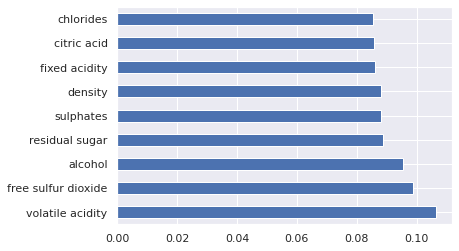

In [ ]:
imp_features = pd.Series(model.feature_importances_, index = x.columns)
imp_features.nlargest(9).plot(kind = 'barh')
plt.show()

In [ ]:
'''
Using SVC - Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, 
Gaussian Naive Bayes, and Logistic Regression. 
'''
model_params  = {
    'svm' : {
        'model':SVC(gamma='auto'),
        'params':{
            'C' : [1,10,20],
            'kernel':['rbf']
        }
    },
    
    'decision_tree':{
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['entropy','gini'],
            'max_depth':[5,8,9]
        }
    },
    
    'random_forest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[1,5,10],
            'max_depth':[5,8,9]
        }
    },
    'naive_bayes':{
        'model': GaussianNB(),
        'params':{}
    },
    
    'logistic_regression' : {
        'model' : LogisticRegression(solver='newton-cg',multi_class = 'multinomial'),
        'params': {
            "C" : [1,5,10]
        }
    }
    
}

In [ ]:
score = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv=8, return_train_score=False, refit=True)
    clf.fit(x,y)
    score.append({
        'Model' : model_name,
        'Best_Score': clf.best_score_,
        'Best_Params': clf.best_params_
    })

In [ ]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


In [ ]:
data_copy4 = pd.DataFrame(score, columns = ['Model', 'Best_Score', 'Best_Params'])

In [ ]:
data_copy4

,Model,Best_Score,Best_Params
0,svm,0.932193,"{'C': 1, 'kernel': 'rbf'}"
1,decision_tree,0.918496,"{'criterion': 'gini', 'max_depth': 5}"
2,random_forest,0.932348,"{'max_depth': 5, 'n_estimators': 5}"
3,naive_bayes,0.727310,{}
4,logistic_regression,0.932815,{'C': 10}


In [ ]:
#-------------------------------------
#From this dataset, it seems that we have three choices - SVM, Random Forest, and Logistic Regression. I'll try on more dataset this week! 
#-------------------------------------
'''
Using SVC
'''
clf_svm = SVC(kernel = 'rbf', C = 1)
scores = cross_val_score(clf_svm, x, y, cv = 8, scoring = 'accuracy')
scores

array([0.93283582, 0.93283582, 0.93283582, 0.93283582, 0.93283582,
       0.93159204, 0.93275218, 0.93275218])

In [ ]:
scores.mean()

0.9326594378667064

In [ ]:
'''
Splitting the dataset in 80/20 train-test ratio. 
'''
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train)
print('-------x_train complete---------')
print(x_test)
print('-------x_test complete---------')
print(y_train)
print('-------y_train complete---------')
print(y_test)
print('-------y_test complete---------')

      fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  white
2660            6.7             0.330         0.34  ...       0.48      9.3      1
3354            5.9             0.200         0.28  ...       0.57     11.8      1
1041            7.7             0.275         0.30  ...       0.56     10.7      1
3490            7.6             0.310         0.24  ...       0.44     11.8      1
2746            7.0             0.340         0.30  ...       0.45     10.8      1
...             ...               ...          ...  ...        ...      ...    ...
4997            8.1             0.545         0.18  ...       0.59      9.0      0
3306            6.0             0.320         0.30  ...       0.42     12.8      1
1669            7.1             0.310         0.38  ...       0.44      9.9      1
2634            8.7             0.310         0.73  ...       0.88      8.7      1
2764            7.9             0.160         0.30  ...       0.37      9.5      1

[51

In [ ]:
clf_svm1 = SVC(kernel='rbf', C = 1)
clf_svm1.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf_svm1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9339035769828927

In [ ]:
'''
Testing on the split test-data
'''
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
accuracy_dataframe.head(n = 5)

,y_test,y_pred
1935,1,1
1106,2,1
2932,1,1
743,1,1
2230,1,1
